<a href="https://colab.research.google.com/github/jvplopes/Detec-o-de-Fraudes-em-Cart-es-de-Cr-dito-Machine-Learning/blob/main/Fraude_banc%C3%A1ria_corrigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

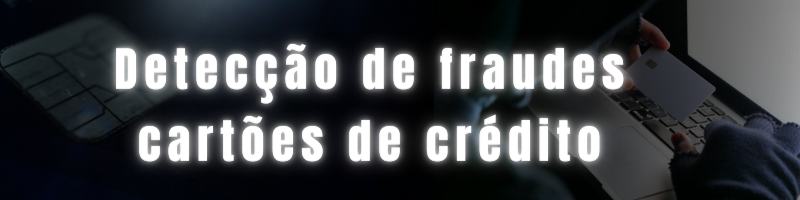

#Detecção de Fraudes em Cartões de Crédito | Machine Learning
*by [João Lopes](https://www.linkedin.com/in/joao-vitor-p-lopes/)*

---

Durante a pandemia o **e-commerce brasileiro cresceu 41%** e **ganhou 13 milhões de novos consumidores**. Um aumento de 29% em relação ao ano de 2019 ([leia mais](https://exame.com/pme/13-milhoes-de-brasileiros-fizeram-primeira-compra-pela-internet-em-2020/)).

Esse aumento não é uma oportunidade somente para os comerciantes, é uma oportunidade para **criminosos** especializados em fraudes de cartões de créditos. No primeiro semestre de 2021, o Brasil registrou um aumento de 33% nas tentativas de fraude com cartão de crédito ([leia mais](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/)).

>“O e-commerce é o destaque dessas tentativas de fraudes, meio pelo qual os criminosos atuaram com força depois que a maior parte das pessoas entrou em isolamento social e passou a fazer mais compras pela internet" Omar Jarouche, diretor de marketing e soluções da Clearsale.

Segundo pesquisa, 83% dos brasileiros tem **medo** de serem vítimas de algum tipo de fraude envolvendo os cartões de crédito e débito ([leia mais](https://epocanegocios.globo.com/Empresa/noticia/2021/10/fraude-no-cartao-e-o-maior-medo-dos-brasileiros.html)).

Nesse contexto, os bancos investem em tecnologia para identificar quando uma transação bancária é autêntica ou fraudulenta.

Neste artigo, usaremos a *Machine Learning* para identificar as transações bancárias fraudulentas.

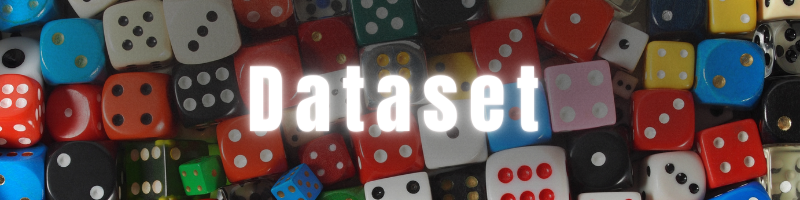


##Informações sobre o dataset
Os dados utilizados neste notebook estão disponíveis no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) e correspondem a dois dias de transações bancárias de alguns bancos europeus no ano de 2013.


*   Contem 284.807 transações, sendo 492 fraudes.
*   As variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).
* Por questões de privacidade, o nome das variáveis foram subtstituidos por outros valores (v1 - v28).

* As variáveis `Time` e `Amount` tiveram os nomes preservados.
* A variável `Class` indica se a transação é fraudulenta.

In [ ]:
#Paleta de cores utilizadas

blue = '#778beb' #soft blue
red = '#e77f67' #brewed mustard
orange = '#f19066' #sawtooth aak
amarelo = '#f7d794' #rose highlight
roxo = '#546de5' #corn flower
#https://flatuicolors.com/palette/ru

In [ ]:
!pip install scikit-plot

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [ ]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)

In [ ]:
#Exibir as primeiras entradas no dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Exibir algumas informações do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###Tamanho
O dataset possui **284.807 entrada**s e **30 colunas**.


*   Não há valores nulos.
*   Todos são do tipo float64, exceto a variável `Clas` que é int64 (0 ou 1).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###Balanceamento da variável `Class`
**0,17%** das transações bancárias do dataset **são fraudes**.

In [ ]:
#Verificar o balanceamento da variável Class

normal, fraude = df.Class.value_counts()

print("transações legítimas: ", normal)
print("transações fraudulentas: ", fraude )
print(fraude / (fraude + normal) * 100)

transações legítimas:  284315
transações fraudulentas:  492
0.1727485630620034


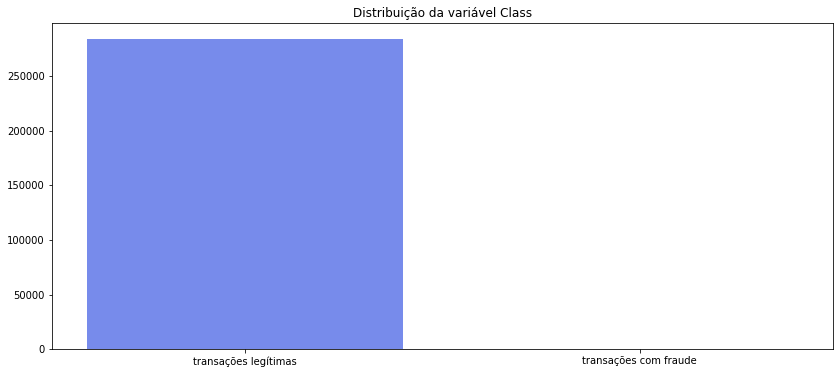

In [ ]:
#Gŕaficos em barra
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

ax.set_title('Distribuição da variável Class')

ax.bar(['transações legítimas', 'transações com fraude'], [normal, fraude], color=[blue,red]);

###Variável `Time`: fraudes X legítimas

Agora, vamos verificar a variável `Time`, comparando as transações legítimas e as fraudulentas.

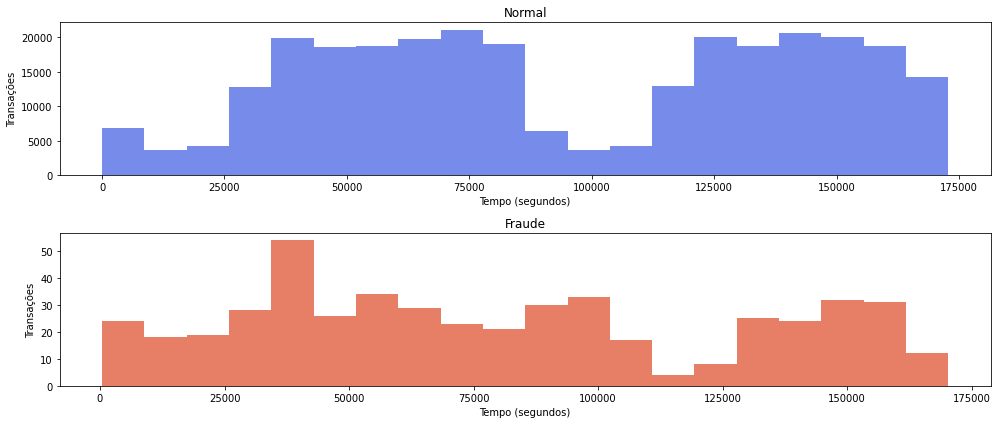

In [ ]:
#Gŕaficos em barra
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,6))

#Gráfico 1
ax[0].set_title("Normal")
ax[0].hist(df.Time[df.Class == 0], bins=20, color=blue)
ax[0].set_ylabel('Transações')
ax[0].set_xlabel('Tempo (segundos)')


#Gráfico 2
ax[1].set_title("Fraude")
ax[1].hist(df.Time[df.Class == 1], bins=20, color=red)
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Tempo (segundos)')

plt.tight_layout();

###Variável `Amount`
Vamos analisar os dados da variável Amount.

In [ ]:
df[df.Class == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
df[df.Class == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Há diferenças entre as medidas de tendência central nos valores de tranferências legítimas e fraudulentas: 

||Normal|Fraude|
|-:-|-:-|-:-|
|Mediana|22|9.25|
|Média|88.29|122.21|


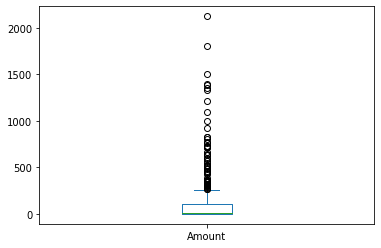

In [ ]:
df[df.Class == 1]['Amount'].plot(kind='box');

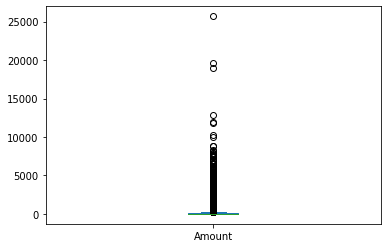

In [ ]:
df[df.Class == 0]['Amount'].plot(kind='box');

Os *boxplots* revelam que há *outliers* na variável `Amount`. Serão tratados durante a fase de preparação dos dados.

###Correlação

A matriz de correlação revela que não há correlação forte, somente correlações moderadas:


*   Correlação negativa moderada no valore de -0,5 entre `Amount` e `V7`.
*   Correlação negativa moderada no valore de -0,4 entre `Amount` e `V2`.

Para aprender sobre o cáculo de correlação padrão do pandas clique [aqui](https://www.linkedin.com/pulse/quem-est%25C3%25A1-por-tr%25C3%25A1s-do-dfcorr-jo%25C3%25A3o-vitor-lopes/?trackingId=Or%2F4424pRO6aq87%2Bwddudg%3D%3D).

In [ ]:
# criando uma matriz de correlação
df_corr = df.corr()

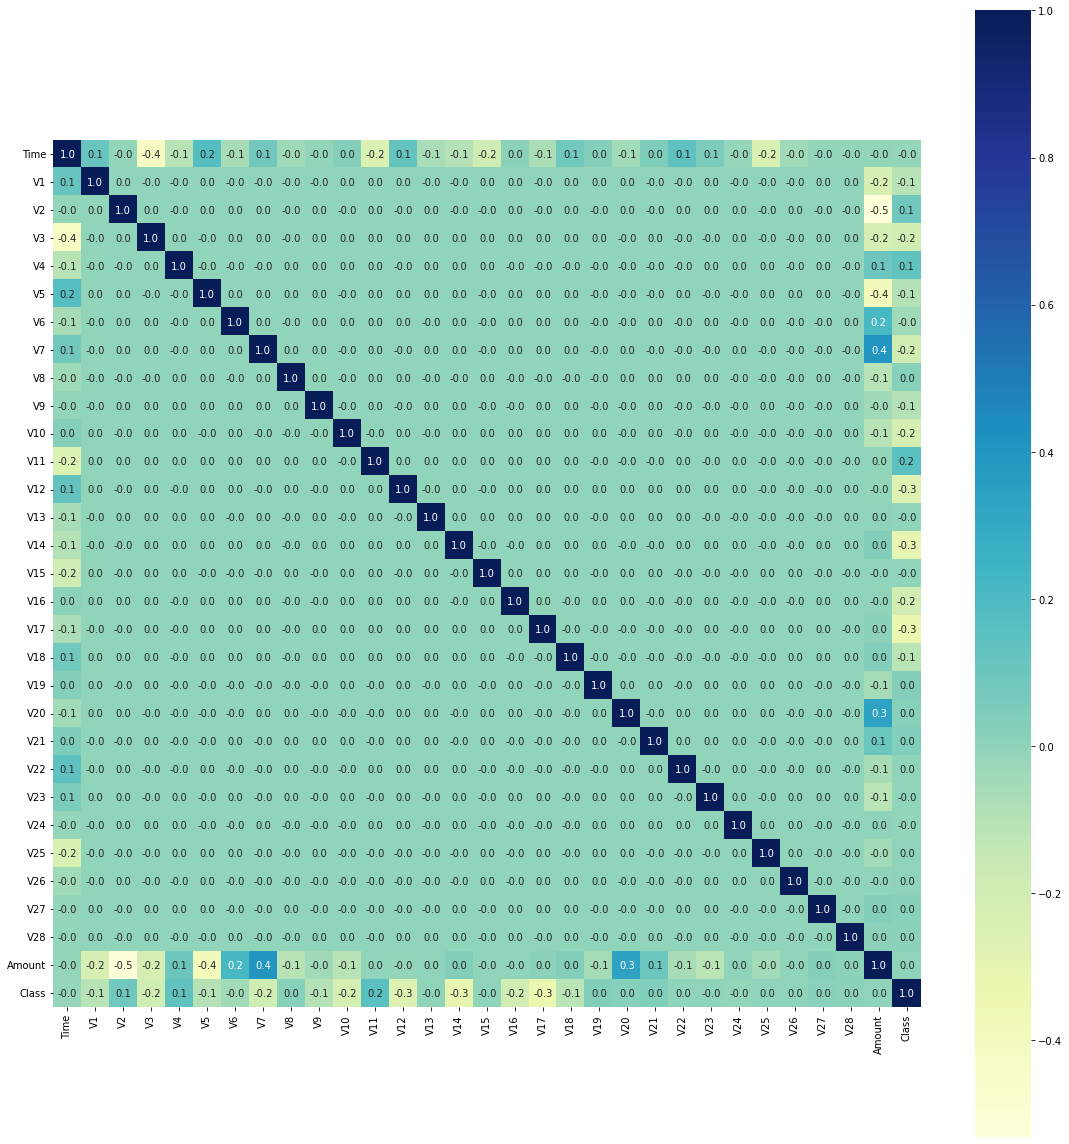

In [ ]:
# plotando o  heatmap
fig, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(df_corr, fmt='.1f', square=True, linecolor='white', vmax=1.0, annot=True, cmap="YlGnBu");

plt.tight_layout()

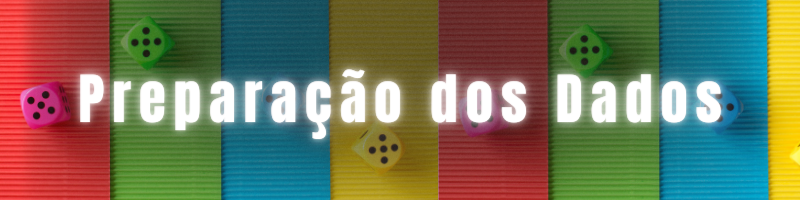

## Preparação dos Dados

Nesta fase os dados serão preparados para o treino do modelo.
* O conjuntos de teste e validação serão separados;
* As variáveis `Time` e `Amount` serão padronizadas;
* A variável `Clas` será balanceada no conjunto de treino.

###Separação do conjunto de testes

O conjunto de testes será separado para ser usado no futura na utilização do modelo para previsão.
Será destinada a fração de **15%** do dataframe.

In [ ]:
# Separar o conjunto de teste
teste = df.sample(frac=0.15, random_state=0)

# Remover as linhas de teste do conjunto original
df = df.drop(teste.index)

# verificando o tamanho dos conjuntos
print("Conjunto de Teste: ", teste.shape)
print("Conjunto de Treino: ", df.shape)

Conjunto de Teste:  (42721, 31)
Conjunto de Treino:  (242086, 31)


###Padronizar as variáveis `Time` e `Amount`

Antes de separar o conjunto de validação, é mais interessante padronizar as variáveis `Time` e `Amount`.

A padronização será feita por dois motivos:
* As variávei possuem intervalos muito diferentes.
* Como verificamos na análise dos dados, a variável `Amount` possui *outliers*.

Para entender melhor o que será feito, vamos observar as primeiras as variáveis antes da padronização.

In [ ]:
#Antes da padronização
df.head(5) #dataframe original

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A padronização será feita por meio da classe `StandardScaler`.

In [ ]:
#padronizar as colunas Time e Amount
df_clean = df.copy() #dataframe padronizado

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#Exibir as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


É interessante observar que, após a padronização, foram inseridas duas novas colunas com os valores padronizados e as colunas antigas foram exluídas.

###Separação do conjunto de Validação

Antes de proceder com o balanceamento de dados, devemos dividir os dados já existentes entre Treino e Teste para conferir se o balanceamento foi adequado.

In [ ]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1) #Remove a coluna Class do df padronizado
y = df['Class'] #Coluna Class

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
X_train.shape[0], X_val.shape[0], y_train.shape[0], y_val.shape[0],

(181564, 60522, 181564, 60522)

In [ ]:
#Divisão do df
print('Divisão do dataframe')
print("Conjunto de treino: ", X_train.shape[0], "({:.2f}%)".format(X_train.shape[0]/284807 * 100))
print("Conjunto de validação: ", X_val.shape[0], "({:.2f}%)".format(X_val.shape[0]/284807 * 100))
print("Conjunto de teste: ", teste.shape[0], "({:.2f}%)".format(teste.shape[0]/284807 * 100))

Divisão do dataframe
Conjunto de treino:  181564 (63.75%)
Conjunto de validação:  60522 (21.25%)
Conjunto de teste:  42721 (15.00%)


O *dataframe* ficou dividido desta forma:

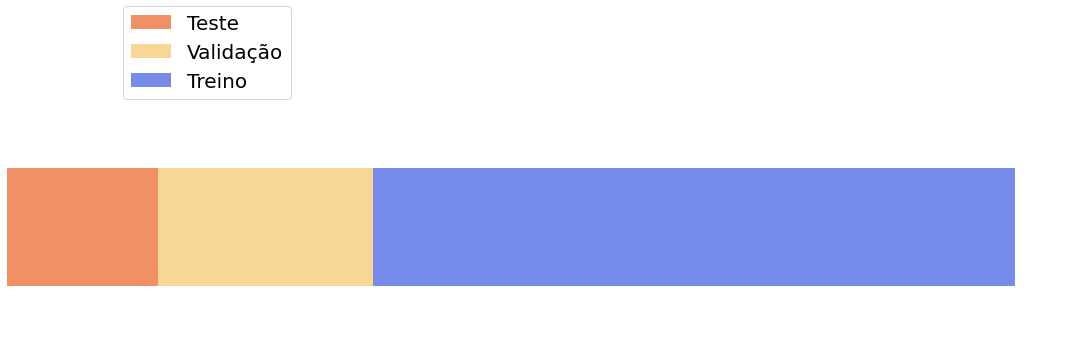

In [ ]:
divisao = pd.DataFrame({'Teste': {0: teste.shape[0]}, 'Validação': {0: X_val.shape[0]}, 'Treino': {0: X_train.shape[0]} })
divisao.plot(kind='barh',stacked=True,legend=False, figsize=(15,5), color=[orange,amarelo,blue])

plt.legend(divisao.columns, bbox_to_anchor=(0.1,1), fontsize=20)
plt.axis("off")
plt.tight_layout()

###Balanceamento dos dados
Como vimos durante a análise de dados, os dados de transações legítimas e fraudulentas estão muito desbalanceados.

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. 
Neste projeto foi usar *Under-sampling*, que preserva a classe minoritária (fraudes) e reduz a classe majoritária (legítimas).

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

Com esse gráfico em barras fica mais fácil de entender a técnica de *Under-sampling*

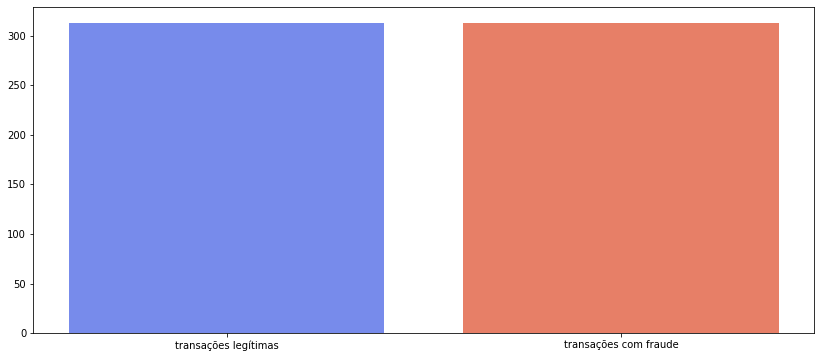

In [ ]:
#Gŕaficos em barra
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

normal, fraude = pd.Series(y_rus).value_counts()

ax.bar(['transações legítimas', 'transações com fraude'], [normal, fraude], color=[blue, red]);

In [ ]:
X_rus.shape[0], y_rus.shape[0]

(626, 626)

Agora, com os dados balanceados, nós obtivemos correlações mais fortes e em maior quantidade.
Observe a matriz de confusão dos dados desbalanceados e dos dados balanceados.

In [ ]:
# criando uma matriz de correlação com os dados balanceados
corr_rus = pd.DataFrame(X_rus).corr() 

Text(0.5, 1.0, 'Balanceado')

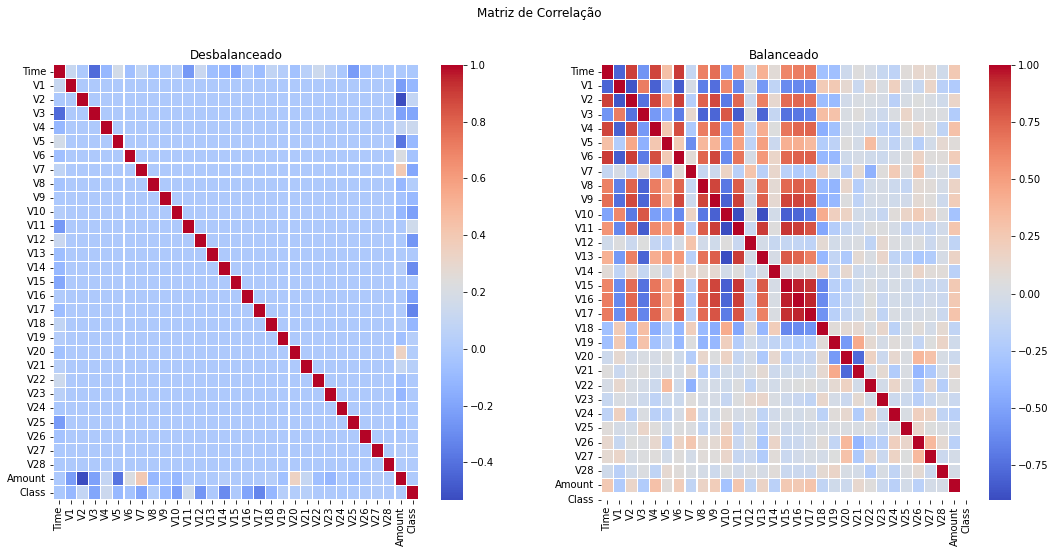

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])

sns.heatmap(corr_rus, xticklabels=df_corr.columns, yticklabels=df_corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
#títulos
ax[0].set_title('Desbalanceado')
ax[1].set_title('Balanceado')

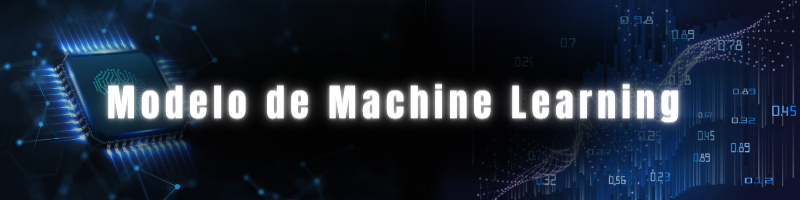

##Modelos de Machine Learning
Com a análise e a preparação dos dados concluídas é possível testar os modelos de ML.
Nesse artigo, utilizaremos Regressão Logística e *Decision trees*.

O que é um modelo?
> "Um modelo é uma especificação de uma relação matemática (ou probabilística) entre diferentes variáveis." - Data Science do Zero, Joel Grus.

Para avaliar os modelos, serão verificadas a precisão (fração de previsões corretas); sensibilidade (determina a fração dos positivos identificados pelo modelo); *F1 Score* (combina precisão e sensibilidade); e a visualização será feita com matriz de confusão.

|Modelo|precisão|sensibilidade|F1 Score|Falso negativo|Falso positivo|
|:-:|:-:|:-:|:-:|:-:|:-:|
|Decision Tree|0.99|0.94|0.97|11%|6%|
|Regressão Logística|0.99|0.96|0.97|7%|4%|

A Regressão logística obteve resultados mais satisfatórios e será utilizada na próxima fase, previsão no conjunto de teste.

###Decision Tree
O primeiro modelo criado será de **Decision Tree**.
>"Uma árvore de decisão representa, em uma estrutura de árvore, um determinado número de caminhos possíveis de decisão e os resultados de cada um deles." Data Science do Zero, Joel Grus.

In [ ]:
# instanciar e treinar um modelo de Decision Tree

model_dt = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model_dt.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred_dt = model_dt.predict(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9428    0.9705     60417
           1     0.0262    0.8857    0.0509       105

    accuracy                         0.9427     60522
   macro avg     0.5130    0.9143    0.5107     60522
weighted avg     0.9981    0.9427    0.9689     60522

Acurácia: 0.9427

AUC: 0.9143



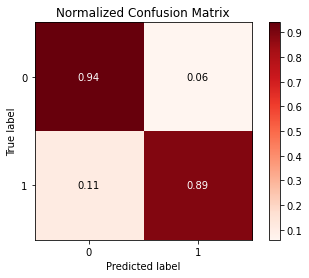

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_dt, normalize=True, cmap='Reds')

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_dt, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_dt)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_dt)))


###Regressão Logística
Nesse modelo é determinada a probabilidade de um evento acontecer a partir de um conjunto de observações

In [ ]:
# instanciar e treinar um modelo de Regressão Logística

model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9608    0.9799     60417
           1     0.0397    0.9333    0.0761       105

    accuracy                         0.9607     60522
   macro avg     0.5198    0.9470    0.5280     60522
weighted avg     0.9982    0.9607    0.9784     60522

Acurácia: 0.9607

AUC: 0.9470



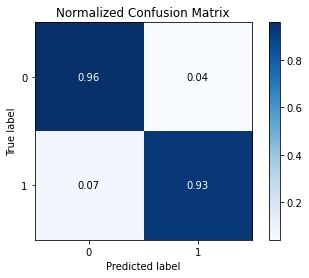

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

##Previsões no conjunto de testes

Antes de fazer as previsões, é necessário padronizar as variáveis `Time` e `Amount` no conjunto de teste, assim como foi feito no conjunto de treino, não iremos balancear para não perdermos dados.

In [ ]:
# padronizar as colunas Time e Amount - Teste
test_clean = teste.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = teste['Class']

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)

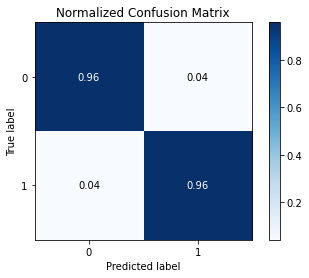

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

##Conclusão

As variáveis fornecidas pelo *dataset* estão formatadas para manter o sigilo dos clientes, o que nos impede de fazer uma análise sobre a correlação entre elas.

O modelo de Regressão Logística teve um bom desempenho no teste. Foi capaz de identificar 96% das fraudes, o que representa uma economia financeira razoável para a instituição financeira.
Por outro lado, 4% da transações bancárias legítimas foram classificadas como fraudulentas, o que, dependendo da política da instituição financeira, pode causar o bloqueio do cartão do cliente, causando insatisfação do cliente. Pessoalmente, já passei por essa situação durante uma viagem e foi bem desagradável.